0.0 1.0 (-9067.295133785849+1180.8858509955558j) (132676.45098039217+0j)
(512, 512) (512, 512)
0.040420500093275635 132676.45098039217


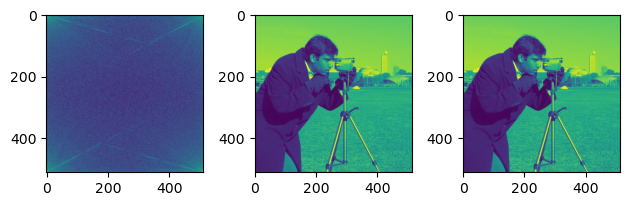

In [22]:
import numpy as np
from skimage import data
import matplotlib.pyplot as plt

im = data.camera() / 255.0
ff = np.fft.fft2(im)
ff = np.fft.fftshift(ff)
# tutaj  modyfikujemy ff
ff = np.fft.ifftshift(ff)
iff = np.fft.ifft2(ff).real

plt.subplot(1, 3, 1)
plt.imshow(np.log1p(np.abs(ff)))
plt.subplot(1, 3, 2)
plt.imshow(iff)
plt.subplot(1, 3, 3)
plt.imshow(im)
plt.tight_layout()
plt.show()

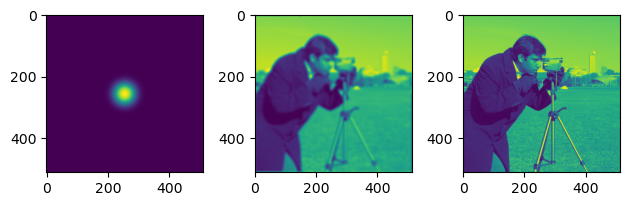

In [34]:
import numpy as np
from skimage import data, filters
import matplotlib.pyplot as plt
import cv2
im = data.camera() / 255.0
ff = np.fft.fft2(im)
ff = np.fft.fftshift(ff)
mask = np.zeros_like(im)
cv2.circle(mask, (mask.shape[1] // 2, mask.shape[0] // 2), 32, 1, -1)
mask = filters.gaussian(mask, sigma=15)
ff = ff * mask
ff = np.fft.ifftshift(ff)
iff = np.fft.ifft2(ff).real

plt.subplot(1, 3, 1)
# plt.imshow(np.log1p(np.abs(np.fft.fftshift(ff))))
plt.imshow(mask)
plt.subplot(1, 3, 2)
plt.imshow(iff)
plt.subplot(1, 3, 3)
plt.imshow(im)
plt.tight_layout()
plt.show()

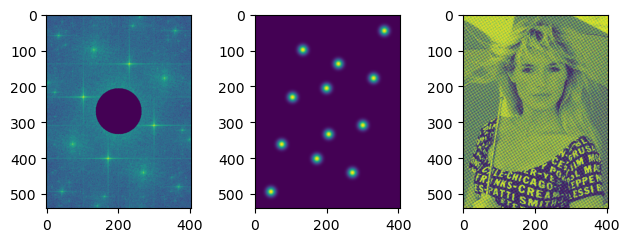

In [50]:
import numpy as np
from skimage import data, io
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max

im = io.imread("images/fft.jpg") / 255.0
ff = np.fft.fft2(im)
ff = np.fft.fftshift(ff)

mask = np.zeros_like(im)
cv2.circle(mask, (mask.shape[1] // 2, mask.shape[0] // 2), 64, 1, -1)

new_mask = np.zeros_like(mask)
for_local_maxima = ff * (1 - mask)
coords = peak_local_max(np.abs(for_local_maxima), min_distance=40)
for c in coords:
    new_mask[c[0], c[1]] = 1
new_mask = filters.gaussian(new_mask, sigma=8)

mask = filters.gaussian(mask, sigma=15)
ff = ff * mask
# tutaj  modyfikujemy ff
ff = np.fft.ifftshift(ff)
iff = np.fft.ifft2(ff).real

plt.subplot(1, 3, 1)
plt.imshow(np.log1p(np.abs((for_local_maxima))))
plt.subplot(1, 3, 2)
plt.imshow(new_mask)
plt.subplot(1, 3, 3)
plt.imshow(im)
plt.tight_layout()
plt.show()

(255, 259)


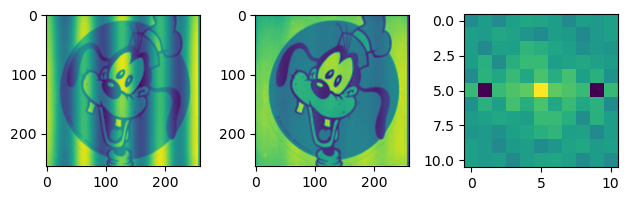

In [66]:
import numpy as np
from skimage import data, filters, io
import matplotlib.pyplot as plt
import cv2
im = io.imread("images/obraz6.png",as_gray=True)
print(im.shape)
ff = np.fft.fft2(im)
ff = np.fft.fftshift(ff)
ff[255//2, 259//2-4] = 0
ff[255//2, 259//2+4] = 0
ff = np.fft.ifftshift(ff)
iff = np.fft.ifft2(ff).real

plt.subplot(1, 3, 1)
plt.imshow(im)
plt.subplot(1, 3, 2)
plt.imshow(iff)
plt.subplot(1, 3, 3)
s = np.s_[255//2-5:255//2+6, 259//2-5:259//2+6]
plt.imshow(np.log1p(np.abs(np.fft.fftshift(ff)))[s])
plt.tight_layout()
plt.show()

więcej: https://thepythoncodingbook.com/2021/08/30/2d-fourier-transform-in-python-and-fourier-synthesis-of-images/